# Claims Management
    As a global specialist in personal insurance, BNP Paribas Cardif serves 90 million clients in 36 countries across Europe, Asia and Latin America.

    In a world shaped by the emergence of new uses and lifestyles, everything is going faster and faster. When facing unexpected events, customers expect their insurer to support them as soon as possible. However, claims management may require different levels of check before a claim can be approved and a payment can be made. With the new practices and behaviors generated by the digital economy, this process needs adaptation thanks to data science to meet the new needs and expectations of customers.
    
    We are going to predict the category of a claim based on features available early in the process, helping BNP Paribas Cardif accelerate its claims process and therefore provide a better service to its customers.

# Target Variable (Y)
    Two categories of claims:
    - 0
    - 1

## Importing Library and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as ss

%matplotlib inline
sns.set(style='darkgrid') #To make the plot's axis shown

In [2]:
pd.options.display.max_columns = 133
df = pd.read_csv('train.csv')
df.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,XDX,-1.716131e-08,C,0.139412,1.720818,3.393503,0.590122,8.880867,C,A,1.083033,1.010829,7.270147,8.375452,11.326592,0.454546,0,4.012088,7.711453,7.653429,12.707581,2.015505,10.498338,9.848672,0.113561,C,12.171733,8.086643,0.899420,7.277792,G,16.747968,0.037096,1.299638,DI,3.971118,0.529802,10.890984,1.588448,15.858152,1,0.153461,6.363189,18.303925,C,9.314079,15.231789,17.142857,11.784549,F,1,1.614988,B,D,2.230940,7.292418,8.571429,E,3.000000,7.528326,8.861647,0.649820,1.299638,1.707317,0.866426,9.551836,3.321300,0.095678,0.905342,A,0.442252,5.814018,3.517720,0.462019,7.436824,5.454545,8.877414,1.191337,19.470199,8.389237,2.757375,4.374296,1.574039,0.007294,12.579184,E,2.382692,3.930922,B,0.433213,O,NaN,15.634907,2.857144,1.951220,6.592012,5.909091,-6.297423e-07,1.059603,0.803572,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,6.507647,NaN,11.636386,NaN,NaN,NaN,NaN,NaN,NaN,6.763110,GUV,NaN,C,3.056144,NaN,NaN,NaN,NaN,C,A,NaN,NaN,3.615077,NaN,14.579479,NaN,0,NaN,14.305766,NaN,NaN,NaN,NaN,NaN,2.449959,E,NaN,NaN,1.379210,NaN,G,NaN,1.129469,NaN,DY,NaN,NaN,NaN,NaN,NaN,2,2.544736,NaN,NaN,A,NaN,NaN,NaN,12.053353,F,2,NaN,B,D,NaN,NaN,NaN,D,NaN,7.277655,3.430691,NaN,NaN,NaN,NaN,9.848004,NaN,2.678584,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,8.303967,NaN,NaN,NaN,NaN,NaN,NaN,1.505335,NaN,B,1.825361,4.247858,A,NaN,U,G,10.308044,NaN,NaN,10.595357,NaN,NaN,NaN,NaN,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,6.384670,2.505589,9.603542,1.984127,5.882353,3.170847,0.244541,0.144258,17.952332,5.245035,FQ,-2.785053e-07,E,0.113997,2.244897,5.306122,0.836005,7.499999,NaN,A,1.454082,1.734693,4.043864,7.959184,12.730517,0.259740,0,7.378964,13.077201,6.173469,12.346939,2.926830,8.897561,5.343819,0.126035,C,12.711328,6.836734,0.604504,9.637627,F,15.102041,0.085573,0.765305,AS,4.030613,4.277456,9.105481,2.151361,16.075602,1,0.123643,5.517949,16.377205,A,8.367347,11.040463,5.882353,8.460654,B,3,2.413618,B,B,1.963971,5.918368,11.764705,E,3.333334,10.194433,8.266200,1.530611,1.530613,2.429906,1.071429,8.447465,3.367346,0.111388,0.811447,G,0.271480,5.156559,4.214944,0.309657,5.663265,5.974026,11.588858,0.841837,15.491329,5.879353,3.292788,5.924457,1.668401,0.008275,11.670572,C,1.375753,1.184211,B,3.367348,S,NaN,11.205561,12.941177,3.129253,3.478911,6.233767,-2.792745e-07,2.138728,2.238806,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,9.646653,3.903302,14.094723,1.945044,5.517242,3.610789,1.224114,0.231630,18.376407,7.517125,ACUE,-4.805344e-07,D,0.148843,1.308269,2.303640,8.926662,8.874521,C,B,1.587644,1.666667,8.703550,8.898468,11.302795,0.433735,0,0.287322,11.523045,7.931035,12.935823,1.470878,12.708574,9.670823,0.108387,C,12.194855,8.591954,3.329176,4.780357,H,16.621695,0.139721,1.178161,BW,3.965517,1.732102,11.777912,1.229246,15.927390,1,0.140260,6.292979,17.011645,A,9.703065,18.568129,9.425288,13.594728,F,2,2.272541,B,D,2.188198,8.213602,13.448277,B,1.947261,4.797873,13.315819,1.681034,1.379310,1.587045,1.242817,10.

## Data Cleaning

In [3]:
# looking at the shape
df.shape

(114321, 133)

In [4]:
# looking at the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Columns: 133 entries, ID to v131
dtypes: float64(108), int64(6), object(19)
memory usage: 116.0+ MB


### Missing Values

In [5]:
# We're going to see the null percentage for each columns
desc_df =[]

for i in df.columns: #mengiterasi setiap nama kolom
    desc_df.append([ 
        i,
        df[i].dtypes,#tipe data
        df[i].isna().sum(),#jumlah NaN/missing values
        round((((df[i].isna().sum())/(len(df)))*100),2),#Persentase jumlah NaN/missing values
        df[i].nunique(),#Jumlah Unique
        df[i].unique() #Nilai Unique
    ])
desc = pd.DataFrame(desc_df, columns=['Columns','Type','NaN','%NaN','NUnique','Unique'])
desc

,Columns,Type,NaN,%NaN,NUnique,Unique
0,ID,int64,0,0.00,114321,"[3, 4, 5, 6, 8, 9, 12, 21, 22, 23, 24, 27, 28,..."
1,target,int64,0,0.00,2,"[1, 0]"
2,v1,float64,49832,43.59,64487,"[1.33573941541, nan, 0.943876910249, 0.7974145..."
3,v2,float64,49796,43.56,64524,"[8.72747443554, nan, 5.31007920093, 8.30475713..."
4,v3,object,3457,3.02,3,"[C, nan, A, B]"
...,...,...,...,...,...,...
128,v127,float64,49832,43.59,64488,"[3.11371907882, nan, 3.92219329592, 2.95438126..."
129,v128,float64,48624,42.53,65687,"[2.02428537747, 1.95782501113, 1.12046841832, ..."
130,v129,int64,0,0.00,10,"[0, 2, 1, 4, 3, 5, 7, 6, 11, 8]"
131,v130,float64,49843,43.60,64476,"[0.636364508524, nan, 0.883117534003, 1.677107..."


So, we have a lot of null values, which we don't want that.

We're going to drop the columns with NaN percentage higher than 1%

In [6]:
# Creating a list of columns name with missing values > 1%
drop_col = []
for i in range(len(desc['%NaN'])):
    if desc['%NaN'][i] > 1:
        drop_col.append(desc['Columns'][i])

len(drop_col) #looking at the total columns that we're going to drop

105

In [7]:
df.drop(drop_col, axis=1, inplace=True)

In [8]:
# create a numerical data visualization to determine how should we fill the missing values
# Looking for numerical data
num_data = []
for i in df.columns:
    if df[i].dtype != 'O':
        num_data.append(i)

# Create a dataframe consists of numerical features
df_num = df[num_data]

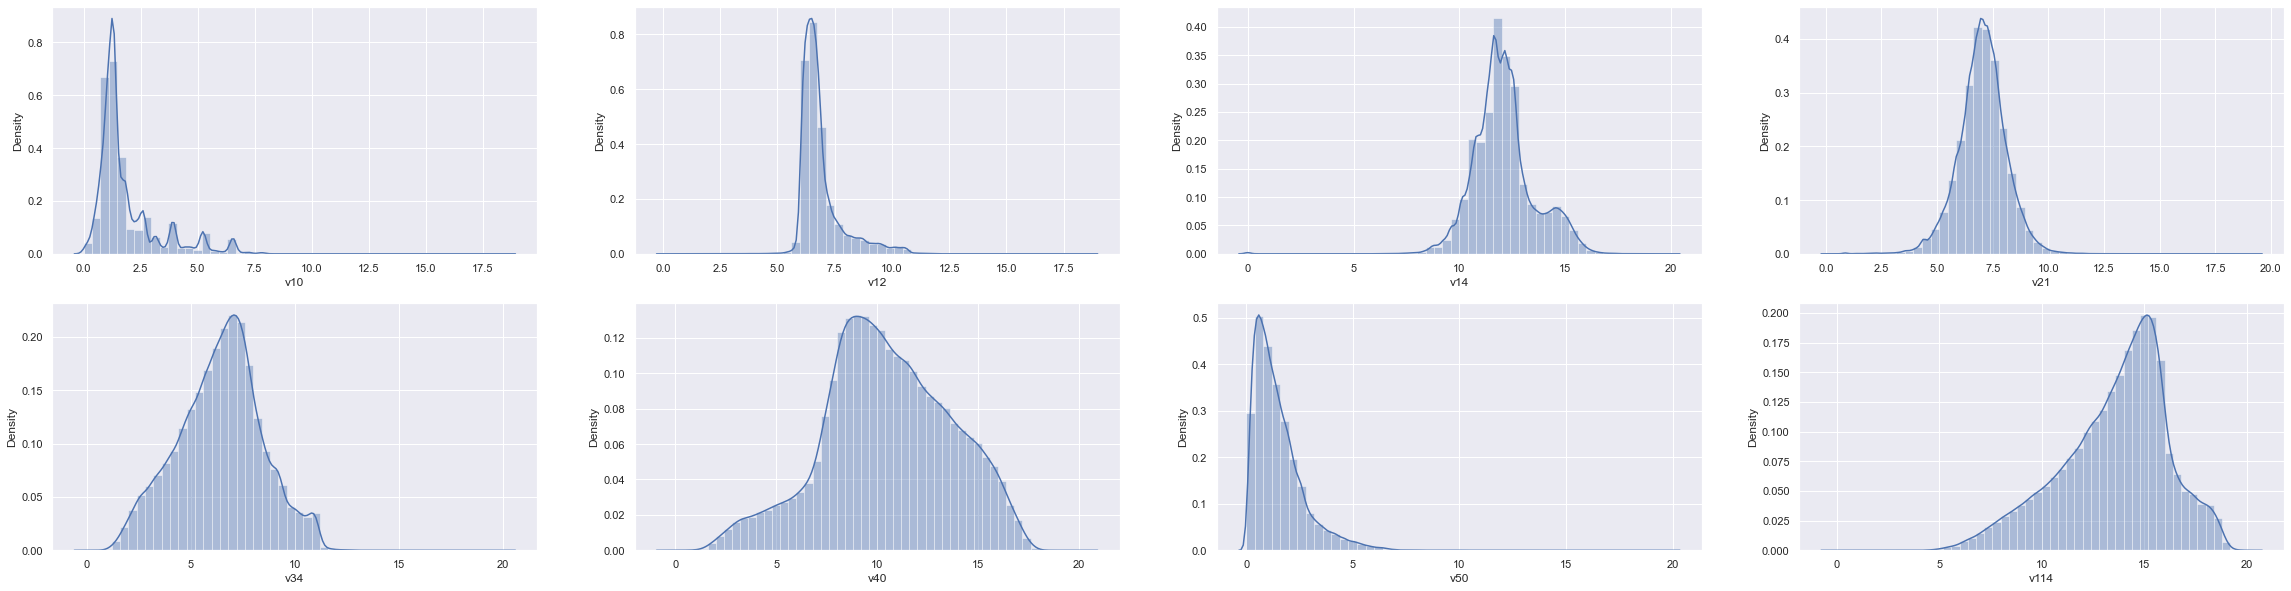

In [9]:
#creating a variables that contains the list of numerical columns with missing values
df_null = df_num[df_num.columns[df_num.isna().any()]]
#plotting the distributions
fig = plt.figure(figsize=(40,10))

for i in range(len(df_null.columns)):
    plt.subplot(2,4,1+i)
    sns.distplot(df_null[df_null.columns[i]])

plt.show()

So we're going to fill the missing values with:
1. Mean if the data is normally distributed (symmetrical)
2. Median if we have a skewed distribution
3. Mode for categorical data

In [10]:
# filling the missing values
filler ={
    "v10" : df["v10"].median(),
    "v12" : df["v12"].median(),
    "v14" : df["v14"].median(),
    "v21" : df["v21"].mean(),
    "v34" : df["v34"].median(),
    "v40" : df["v40"].mean(),
    "v50" : df["v50"].median(),
    "v114" : df["v114"].median(),
    "v22" : df["v22"].mode()[0],
    "v52" : df["v52"].mode()[0],
    "v91" : df["v91"].mode()[0],
    "v107" : df["v107"].mode()[0],
    "v125" : df["v125"].mode()[0],
    "v112" : df["v112"].mode()[0],
}
df = df.fillna(filler)
# checking the missing values
df.isna().sum()

ID        0
target    0
v10       0
v12       0
v14       0
v21       0
v22       0
v24       0
v34       0
v38       0
v40       0
v47       0
v50       0
v52       0
v62       0
v66       0
v71       0
v72       0
v74       0
v75       0
v79       0
v91       0
v107      0
v110      0
v112      0
v114      0
v125      0
v129      0
dtype: int64

In [11]:
# looking at duplicated data
df.duplicated().sum()

0

Okay, so we have no duplicated data, and it's a good sign.

### Removing Constant Features
    We need to remove the feature (x) with variance = 0. Because a constant data won't have any predictive power.

In [12]:
# Looking for numerical data
temp = []
for i in df.columns:
    if df[i].dtype != 'O':
        temp.append(i)

# Create a dataframe consists of numerical features
df_num = df[temp]

In [13]:
# Searching for constant features
constants = [features for features in df_num.columns if df_num[features].std() == 0]
len(constants)

0

Apperently we don't have any constant features

In [14]:
# now we are going to fill the missing values based on the data distributions
# but first we are going to encode the categorical columns
for i in df.select_dtypes(include='object'):
    df[i] = df[i].astype('category').cat.codes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Data columns (total 28 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      114321 non-null  int64  
 1   target  114321 non-null  int64  
 2   v10     114321 non-null  float64
 3   v12     114321 non-null  float64
 4   v14     114321 non-null  float64
 5   v21     114321 non-null  float64
 6   v22     114321 non-null  int16  
 7   v24     114321 non-null  int8   
 8   v34     114321 non-null  float64
 9   v38     114321 non-null  int64  
 10  v40     114321 non-null  float64
 11  v47     114321 non-null  int8   
 12  v50     114321 non-null  float64
 13  v52     114321 non-null  int8   
 14  v62     114321 non-null  int64  
 15  v66     114321 non-null  int8   
 16  v71     114321 non-null  int8   
 17  v72     114321 non-null  int64  
 18  v74     114321 non-null  int8   
 19  v75     114321 non-null  int8   
 20  v79     114321 non-null  int8   
 21  v91     11

### Outliers

In [15]:
desc_df =[]

for i in df.columns: #mengiterasi setiap nama kolom
    desc_df.append([ 
        i,
        df[i].dtypes,#tipe data
        df[i].isna().sum(),#jumlah NaN/missing values
        round((((df[i].isna().sum())/(len(df)))*100),2),#Persentase jumlah NaN/missing values
        df[i].nunique(),#Jumlah Unique
        df[i].unique() #Nilai Unique
    ])
desc = pd.DataFrame(desc_df, columns=['Columns','Type','NaN','%NaN','NUnique','Unique'])
desc

,Columns,Type,NaN,%NaN,NUnique,Unique
0,ID,int64,0,0.0,114321,"[3, 4, 5, 6, 8, 9, 12, 21, 22, 23, 24, 27, 28,..."
1,target,int64,0,0.0,2,"[1, 0]"
2,v10,float64,0,0.0,112485,"[0.503281467753, 1.31290991714, 0.765863972354..."
3,v12,float64,0,0.0,114233,"[6.08571076128, 6.50764677834, 6.38467003054, ..."
4,v14,float64,0,0.0,110472,"[11.6363868896, 11.6363858116, 9.60354169034, ..."
5,v21,float64,0,0.0,113710,"[7.73092330797, 6.76310950301, 5.245035293, 7...."
6,v22,int16,0,0.0,18210,"[16670, 7733, 7086, 1510, 8037, 4579, 11282, 3..."
7,v24,int8,0,0.0,5,"[2, 4, 3, 0, 1]"
8,v34,float64,0,0.0,114210,"[7.2701466347, 3.61507749877, 4.04386445402, 8..."
9,v38,int64,0,0.0,12,"[0, 4, 1, 2, 6, 5, 8, 3, 10, 9, 12, 7]"


In [16]:
# encoding categorical data
for i in df.select_dtypes(include='object'):
    df[i] = df[i].astype('category').cat.codes

df.head(10)

,ID,target,v10,v12,v14,v21,v22,v24,v34,v38,v40,v47,v50,v52,v62,v66,v71,v72,v74,v75,v79,v91,v107,v110,v112,v114,v125,v129
0,3,1,0.503281,6.085711,11.636387,7.730923,16670,2,7.270147,0,7.711453,2,0.899420,6,1,2,4,1,1,3,4,0,4,1,14,15.634907,21,0
1,4,1,1.312910,6.507647,11.636386,6.763110,7733,2,3.615077,0,14.305766,4,1.379210,6,2,0,4,2,1,3,3,1,1,0,20,10.308044,6,0
2,5,1,0.765864,6.384670,9.603542,5.245035,7086,4,4.043864,0,13.077201,2,0.604504,5,1,0,1,3,1,1,4,6,2,1,18,11.205561,5,2
3,6,1,6.542669,9.646653,14.094723,7.517125,1510,3,8.703550,0,11.523045,2,3.329176,7,1,0,4,2,1,3,1,1,1,1,9,13.777666,64,1
4,8,1,1.050328,6.320087,10.991098,6.414567,8037,4,6.083151,0,10.138920,8,1.364536,7,1,2,4,1,1,3,2,6,2,0,19,14.097099,89,0
5,9,0,1.050328,6.216077,11.916255,7.351426,4579,0,7.496613,0,7.903915,8,1.653583,10,1,0,4,1,1,3,8,6,2,0,3,15.750502,87,0
6,12,0,2.341356,7.711174,12.148604,6.661479,11282,4,3.964911,0,14.787641,2,0.133520,0,2,0,4,2,1,3,4,1,1,1,8,9.010082,37,0
7,21,1,1.838074,6.424482,12.793945,7.806704,3861,3,11.077506,0,3.034513,8,2.682121,2,2,2,4,2,1,3,2,0,4,0,5,18.705610,52,0
8,22,0,4.463894,8.715047,12.603403,6.034953,7521,4,6.952621,0,12.199552,3,1.675592,7,0,1,1,0,1,1,15,2,3,2,11,12.536835,82,0
9,23,1,2.363238,7.417853,13.790046,8.312447,12769,2,6.498729,0,10.803126,8,0.993324,0,3,0,4,3,1,3,2,0,4,0,9,13.434123,68,0


In [17]:
# First we need to drop the ID columns since it's not relevant to our modeling
df.drop('ID', axis=1, inplace=True)

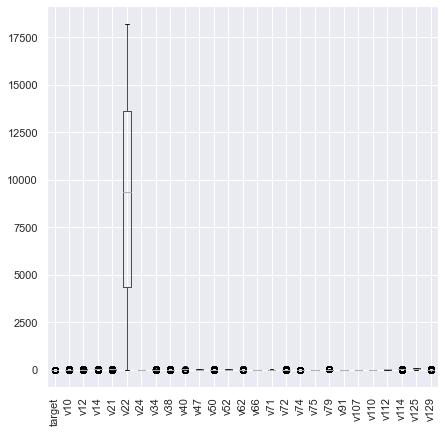

In [18]:
plt.figure(figsize=(7,7))
fig = df.boxplot()
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show()

We're going to see the outliers plot without 'v22' columns

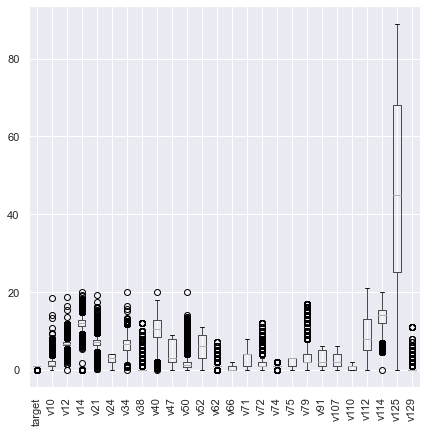

In [19]:
corr_ = df.drop('v22', axis=1)

plt.figure(figsize=(7,7))
fig = corr_.boxplot()
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show()

### Correlation

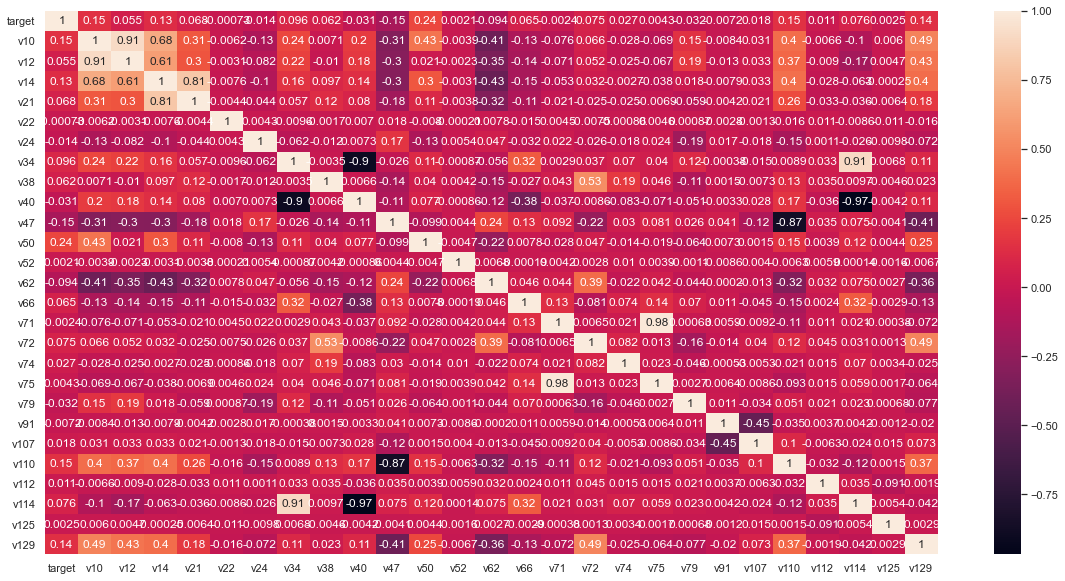

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Dependent Variable Proportion

In [21]:
# importing library to split the data
from sklearn.model_selection import train_test_split,GridSearchCV
#s splitting the data
x = df.drop(columns="target")
y = df["target"]

<AxesSubplot:ylabel='target'>

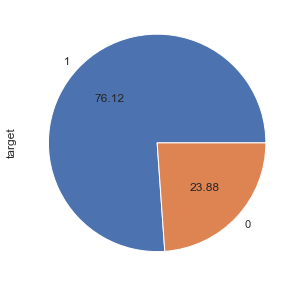

In [22]:
plt.figure(figsize=(10,5))
y.value_counts().plot.pie(autopct='%.2f')

So, we hava an imbalance target variable, thus i'm going to use random oversampling to handle the imbalance data

In [23]:
# Importing package
from imblearn.over_sampling import RandomOverSampler
# Oversampling method
ros = RandomOverSampler(sampling_strategy="not majority")
x,y = ros.fit_resample(x,y)

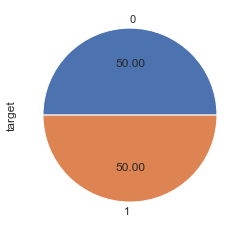

In [24]:
val = y.value_counts().plot.pie(autopct='%.2f')

Now we have a balanced target variable

## Modeling
I'll use Logistic Regression, Decision Tree, Random Forest and Bagging:
1. Prove that if we use a linier model for a data with many outliers since it's very sensitive with outliers, we can't get a good model even if we scale the data
2. Using tree-based model is a good choice to modeling a data with many outliers and i'll use a non-scaled data to fit the model since tree-based models don't care about the difference magnitude in our data
3. I use Bagging and RandomForest to see if we can get a better result using ensemble methods. Since we are focusing on tree-based model which is known to have a high variance it's better to use Bagging and RandomForest(specialized bagging for tree) because Bagging algorithms reduce variances of our base model.

In [25]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,test_size=.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((139233, 26), (34809, 26), (139233,), (34809,))

In [27]:
SS = StandardScaler()
x_train_SS = SS.fit_transform(x_train)
x_test_SS = SS.fit_transform(x_test)

In [28]:
x_train_scaled = SS.fit_transform(x_train)
x_test_scaled = SS.fit_transform(x_test)

### Logistic Regression

In [29]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_lr_train = lr.predict(x_train_scaled)
y_lr_test = lr.predict(x_test_scaled)
acc_lr_train = accuracy_score(y_train,y_lr_train)
acc_lr_test = accuracy_score(y_test,y_lr_test)
f1_lr_train = f1_score(y_train,y_lr_train,average="macro")
f1_lr_test = f1_score(y_test,y_lr_test,average="macro")

status_lr = []

In [30]:
print(f"Nilai Akurasi Logistic Regression : \n train : {acc_lr_train} \n test : {acc_lr_test} ")
if (acc_lr_train-acc_lr_test) > 0.1 :
    print("Overfitting")
    status_lr.append("Overfitting")
elif (acc_lr_train-acc_lr_test) < -0.1 :
    print("UnderFitting") 
    status_lr.append("Underfitting")
else :
    print("Just Right")
    status_lr.append("Just Right")

Nilai Akurasi Logistic Regression : 
 train : 0.6492857296761544 
 test : 0.6516418167715246 
Just Right


In [31]:
print(f"Nilai F1 Score Logistic Regression : \n train : {f1_lr_train} \n test : {f1_lr_test} ")
if (f1_lr_train-f1_lr_test) > 0.1 :
    print("Overfitting")
    status_lr.append("Overfitting")
elif (f1_lr_train-f1_lr_test) < -0.1 :
    print("UnderFitting") 
    status_lr.append("Underfitting")
else :
    print("Just Right")
    status_lr.append("Just Right")

Nilai F1 Score Logistic Regression : 
 train : 0.6441117198904384 
 test : 0.6467044573504365 
Just Right


### Decision Tree

In [32]:
dt = DecisionTreeClassifier(random_state=42, min_samples_split=3, min_samples_leaf=1,splitter='random')
dt.fit(x_train,y_train)
y_dt_train = dt.predict(x_train)
y_dt_test = dt.predict(x_test)
acc_dt_train = accuracy_score(y_train,y_dt_train)
acc_dt_test = accuracy_score(y_test,y_dt_test)
f1_dt_train = f1_score(y_train,y_dt_train,average="macro")
f1_dt_test = f1_score(y_test,y_dt_test,average="macro")

status_dt = []

In [33]:
print(f"Nilai Akurasi Decision Tree : \n train : {acc_dt_train} \n test : {acc_dt_test} ")
if (acc_dt_train-acc_dt_test) > 0.1 :
    print("Overfitting")
    status_dt.append("Overfitting")
elif (acc_dt_train-acc_dt_test) < -0.1 :
    print("UnderFitting") 
    status_dt.append("Underfitting")
else :
    print("Just Right")
    status_dt.append("Just Right")

Nilai Akurasi Decision Tree : 
 train : 0.9959276895563551 
 test : 0.859863828320262 
Overfitting


In [34]:
print(f"Nilai F1-Score Decision Tree : \n train : {f1_dt_train} \n test : {f1_dt_test} ")
if (f1_dt_train-f1_dt_test) > 0.1 :
    print("Overfitting")
    status_dt.append("Overfitting")
elif (f1_dt_train-f1_dt_test) < -0.1 :
    print("UnderFitting") 
    status_dt.append("Underfitting")
else :
    print("Just Right")
    status_dt.append("Just Right")

Nilai F1-Score Decision Tree : 
 train : 0.9959276222592233 
 test : 0.8586215056631828 
Overfitting


### Random Forest

In [35]:
rf = RandomForestClassifier(random_state=10, 
                            n_estimators=200, 
                            min_samples_split=3, 
                            min_samples_leaf=1,
                            max_features='log2')
rf.fit(x_train,y_train)
y_rf_train = rf.predict(x_train)
y_rf_test = rf.predict(x_test)
acc_rf_train = accuracy_score(y_train,y_rf_train)
acc_rf_test = accuracy_score(y_test,y_rf_test)
f1_rf_train = f1_score(y_train,y_rf_train,average="macro")
f1_rf_test = f1_score(y_test,y_rf_test,average="macro")

status_rf = []

In [36]:
print(f"Nilai Akurasi Random Forest : \n train : {acc_rf_train} \n test : {acc_rf_test} ")
if (acc_rf_train-acc_rf_test) > 0.1 :
    print("Overfitting")
    status_rf.append("Overfitting")
elif (acc_rf_train-acc_rf_test) < -0.1 :
    print("UnderFitting") 
    status_rf.append("Underfitting")
else :
    print("Just Right")
    status_rf.append("Just Right")

Nilai Akurasi Random Forest : 
 train : 0.999992817794632 
 test : 0.920796345772645 
Just Right


In [37]:
print(f"Nilai F1-Score Random Forest : \n train : {f1_rf_train} \n test : {f1_rf_test} ")
if (f1_rf_train-f1_rf_test) > 0.1 :
    print("Overfitting")
    status_rf.append("Overfitting")
elif (f1_rf_train-f1_rf_test) < -0.1 :
    print("UnderFitting") 
    status_rf.append("Underfitting")
else :
    print("Just Right")
    status_rf.append("Just Right")

Nilai F1-Score Random Forest : 
 train : 0.9999928177946306 
 test : 0.9207250351938712 
Just Right


In [41]:
# Feature Importance
temp = pd.DataFrame({
 'Variabel' : df.columns[:-1],
 'Importance': rf.feature_importances_
})
temp.sort_values(by = 'Importance', ascending = False)

,Variabel,Importance
10,v47,0.131968
1,v10,0.071069
3,v14,0.066995
23,v112,0.066264
4,v21,0.065030
8,v38,0.064785
6,v24,0.064361
2,v12,0.063276
0,target,0.060218
24,v114,0.054056


### Bootstrap Aggregating

In [43]:
bag = BaggingClassifier(base_estimator=dt, bootstrap=True, n_estimators=200)
bag.fit(x_train,y_train)
y_bag_train = bag.predict(x_train)
y_bag_test = bag.predict(x_test)
acc_bag_train = accuracy_score(y_train,y_bag_train)
acc_bag_test = accuracy_score(y_test,y_bag_test)
f1_bag_train = f1_score(y_train,y_bag_train,average="macro")
f1_bag_test = f1_score(y_test,y_bag_test,average="macro")

status_bag = []

In [44]:
print(f"Nilai Akurasi Bagging : \n train : {acc_bag_train} \n test : {acc_bag_test} ")
if (acc_bag_train-acc_bag_test) > 0.1 :
    print("Overfitting")
    status_bag.append("Overfitting")
elif (acc_bag_train-acc_bag_test) < -0.1 :
    print("UnderFitting") 
    status_bag.append("Underfitting")
else :
    print("Just Right")
    status_bag.append("Just Right")

Nilai Akurasi Bagging : 
 train : 0.999992817794632 
 test : 0.918239535752248 
Just Right


In [45]:
print(f"Nilai F1-Score Bagging : \n train : {f1_bag_train} \n test : {f1_bag_test} ")
if (f1_bag_train-f1_bag_test) > 0.1 :
    print("Overfitting")
    status_bag.append("Overfitting")
elif (f1_bag_train-f1_bag_test) < -0.1 :
    print("UnderFitting") 
    status_bag.append("Underfitting")
else :
    print("Just Right")
    status_bag.append("Just Right")

Nilai F1-Score Bagging : 
 train : 0.999992817794632 
 test : 0.9181512844270787 
Just Right


### Confusion Matrix

In [ ]:
cm_lr = confusion_matrix(y_test,y_lr_test)

plt.figure(figsize = (5, 3))
sns.heatmap(cm_lr, annot = True, fmt = 'g', cmap = 'Blues', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [ ]:
cm_dt = confusion_matrix(y_test,y_dt_test)

plt.figure(figsize = (5, 3))
sns.heatmap(cm_dt, annot = True, fmt = 'g', cmap = 'Blues', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [ ]:
cm_rf = confusion_matrix(y_test,y_rf_test)

plt.figure(figsize = (5, 3))
sns.heatmap(cm_rf, annot = True, fmt = 'g', cmap = 'Blues', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [ ]:
cm_bag = confusion_matrix(y_test,y_bag_test)

plt.figure(figsize = (5, 3))
sns.heatmap(cm_bag, annot = True, fmt = 'g', cmap = 'Blues', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()